# Day 94: AI in Manufacturing - Predictive Maintenance and Quality Control

## Introduction

Artificial Intelligence is revolutionizing the manufacturing industry, transforming traditional production processes into smart, data-driven operations. AI applications in manufacturing span across predictive maintenance, quality control, process optimization, supply chain management, and robotics. These technologies enable manufacturers to reduce downtime, improve product quality, optimize resource utilization, and increase overall operational efficiency.

In this lesson, we will explore how AI techniques are applied to solve critical manufacturing challenges. We'll focus on two key applications: **predictive maintenance** (forecasting equipment failures before they occur) and **quality control** (detecting defects in products using machine learning). These applications demonstrate how supervised learning, time series analysis, and anomaly detection can create significant value in industrial settings.

The integration of AI in manufacturing, often referred to as Industry 4.0 or smart manufacturing, is not just about automation—it's about creating intelligent systems that can learn from data, adapt to changing conditions, and make decisions that optimize the entire production ecosystem.

### Learning Objectives

By the end of this lesson, you will be able to:

- Understand the key applications of AI in manufacturing environments
- Implement a predictive maintenance model using machine learning classification
- Build a quality control system for defect detection using computer vision concepts
- Apply anomaly detection techniques to identify unusual patterns in sensor data
- Evaluate model performance using industry-relevant metrics
- Understand the business impact of AI implementations in manufacturing

## Theory: AI Applications in Manufacturing

### 1. Predictive Maintenance

Predictive maintenance uses machine learning to predict when equipment is likely to fail, allowing maintenance to be performed just in time—neither too early (wasting resources) nor too late (causing breakdowns). This approach contrasts with:

- **Reactive maintenance**: Fixing equipment after it breaks (costly downtime)
- **Preventive maintenance**: Scheduled maintenance at fixed intervals (potentially unnecessary)

#### Mathematical Foundation

Predictive maintenance is typically framed as a **binary classification problem**:

Given sensor readings $X = [x_1, x_2, ..., x_n]$ at time $t$, predict:

$$y = \begin{cases} 1 & \text{if failure will occur within time window } \Delta t \\ 0 & \text{otherwise} \end{cases}$$

Common features include:
- Temperature, vibration, pressure readings
- Operating hours since last maintenance
- Historical failure patterns
- Environmental conditions

The model learns the function $f: X \rightarrow y$ that maps sensor readings to failure probability:

$$P(\text{failure} | X) = \sigma(w^T X + b)$$

where $\sigma$ is often the sigmoid function for logistic regression, or more complex functions for ensemble methods like Random Forest or XGBoost.

### 2. Quality Control and Defect Detection

AI-powered quality control systems automatically inspect products for defects, replacing or augmenting manual inspection. This can involve:

- **Computer vision** for visual defect detection
- **Sensor analysis** for dimensional or functional defects
- **Statistical process control** for identifying out-of-specification products

#### Classification for Defect Detection

For a product with measured features $X = [x_1, x_2, ..., x_m]$, classify as:

$$y = \begin{cases} 1 & \text{defective} \\ 0 & \text{acceptable} \end{cases}$$

Key metrics for quality control models:

- **Precision**: $P = \frac{TP}{TP + FP}$ (avoid false alarms)
- **Recall (Sensitivity)**: $R = \frac{TP}{TP + FN}$ (catch all defects)
- **F1-Score**: $F_1 = 2 \cdot \frac{P \cdot R}{P + R}$ (balance both)

In manufacturing, the cost of missing a defect (False Negative) versus incorrectly flagging a good product (False Positive) must be carefully balanced.

### 3. Anomaly Detection

Anomaly detection identifies unusual patterns in sensor data that may indicate problems. For a data point $x$, we compute an anomaly score $s(x)$:

$$s(x) = ||x - \mu|| \text{ or } P(x | \text{normal})$$

Points with high anomaly scores are flagged for investigation. Common approaches include:

- **Statistical methods**: Z-score, isolation forests
- **Distance-based**: K-nearest neighbors
- **Density-based**: Local outlier factor (LOF)

### Real-World Applications

1. **Automotive Manufacturing**: Detecting paint defects, predicting robot arm failures
2. **Semiconductor Production**: Identifying wafer defects, optimizing yield
3. **Food Processing**: Quality inspection, contamination detection
4. **Aerospace**: Predicting maintenance needs for critical components
5. **Textile Industry**: Fabric defect detection, color quality control

## Python Implementation

Let's implement practical examples of AI in manufacturing. We'll start by importing necessary libraries and creating synthetic datasets that simulate real manufacturing scenarios.

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

# Configure plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("Libraries imported successfully!")
print(f"NumPy version: {np.__version__}")
print(f"Pandas version: {pd.__version__}")

Libraries imported successfully!
NumPy version: 2.3.4
Pandas version: 2.3.3


### Creating Synthetic Manufacturing Data

We'll create two datasets:
1. **Predictive Maintenance Dataset**: Sensor data from industrial equipment
2. **Quality Control Dataset**: Product measurements for defect detection

In [2]:
# Generate synthetic predictive maintenance dataset
n_samples = 1000

# Normal operating conditions
normal_temp = np.random.normal(75, 5, int(n_samples * 0.85))  # Temperature (°C)
normal_vibration = np.random.normal(0.5, 0.1, int(n_samples * 0.85))  # Vibration (mm/s)
normal_pressure = np.random.normal(100, 10, int(n_samples * 0.85))  # Pressure (PSI)
normal_rpm = np.random.normal(1500, 50, int(n_samples * 0.85))  # Rotations per minute
normal_labels = np.zeros(int(n_samples * 0.85))  # No failure

# Pre-failure conditions (equipment about to fail)
failure_temp = np.random.normal(95, 8, int(n_samples * 0.15))  # Higher temperature
failure_vibration = np.random.normal(1.2, 0.3, int(n_samples * 0.15))  # Higher vibration
failure_pressure = np.random.normal(85, 15, int(n_samples * 0.15))  # Lower pressure
failure_rpm = np.random.normal(1400, 100, int(n_samples * 0.15))  # Irregular RPM
failure_labels = np.ones(int(n_samples * 0.15))  # Failure imminent

# Combine data
temperature = np.concatenate([normal_temp, failure_temp])
vibration = np.concatenate([normal_vibration, failure_vibration])
pressure = np.concatenate([normal_pressure, failure_pressure])
rpm = np.concatenate([normal_rpm, failure_rpm])
labels = np.concatenate([normal_labels, failure_labels])

# Add operating hours and age features
operating_hours = np.random.uniform(0, 10000, n_samples)
equipment_age = np.random.uniform(0, 20, n_samples)  # Years

# Create DataFrame
maintenance_data = pd.DataFrame({
    'temperature': temperature,
    'vibration': vibration,
    'pressure': pressure,
    'rpm': rpm,
    'operating_hours': operating_hours,
    'equipment_age': equipment_age,
    'failure': labels.astype(int)
})

# Shuffle the data
maintenance_data = maintenance_data.sample(frac=1, random_state=42).reset_index(drop=True)

print("Predictive Maintenance Dataset:")
print(f"Total samples: {len(maintenance_data)}")
print(f"Failure cases: {maintenance_data['failure'].sum()} ({maintenance_data['failure'].mean()*100:.1f}%)")
print(f"Normal cases: {(1-maintenance_data['failure']).sum()} ({(1-maintenance_data['failure']).mean()*100:.1f}%)")
print("\nFirst few rows:")
print(maintenance_data.head())
print("\nSummary statistics:")
print(maintenance_data.describe())

Predictive Maintenance Dataset:
Total samples: 1000
Failure cases: 150 (15.0%)
Normal cases: 850 (85.0%)

First few rows:
   temperature  vibration    pressure          rpm  operating_hours  \
0    77.716801   0.671171   93.524582  1585.125733      9725.682356   
1    79.913455   0.463297  108.260472  1489.416651      4161.609464   
2    65.795629   0.392786  117.495839  1570.926567      8208.490093   
3    72.131690   0.385831   89.706285  1559.174683      6558.207673   
4    69.376790   0.507601   98.372071  1469.570514      7270.185270   

   equipment_age  failure  
0      17.087990        0  
1       6.329376        0  
2       0.256433        0  
3      18.669102        0  
4       0.200940        0  

Summary statistics:
       temperature    vibration     pressure          rpm  operating_hours  \
count  1000.000000  1000.000000  1000.000000  1000.000000      1000.000000   
mean     78.032822     0.617217    97.432025  1484.842818      4991.526135   
std       9.146541     0.294

In [3]:
# Generate synthetic quality control dataset
n_products = 800

# Acceptable products
good_length = np.random.normal(100, 0.5, int(n_products * 0.9))  # Length (mm)
good_width = np.random.normal(50, 0.3, int(n_products * 0.9))  # Width (mm)
good_weight = np.random.normal(250, 5, int(n_products * 0.9))  # Weight (g)
good_surface_roughness = np.random.normal(1.5, 0.2, int(n_products * 0.9))  # Roughness (μm)
good_labels = np.zeros(int(n_products * 0.9))  # Acceptable

# Defective products
defect_length = np.random.normal(100, 2.5, int(n_products * 0.1))  # Higher variation
defect_width = np.random.normal(50, 2.0, int(n_products * 0.1))  # Higher variation
defect_weight = np.random.normal(250, 20, int(n_products * 0.1))  # Higher variation
defect_surface_roughness = np.random.normal(3.0, 1.0, int(n_products * 0.1))  # Rougher surface
defect_labels = np.ones(int(n_products * 0.1))  # Defective

# Combine data
length = np.concatenate([good_length, defect_length])
width = np.concatenate([good_width, defect_width])
weight = np.concatenate([good_weight, defect_weight])
surface_roughness = np.concatenate([good_surface_roughness, defect_surface_roughness])
quality_labels = np.concatenate([good_labels, defect_labels])

# Create DataFrame
quality_data = pd.DataFrame({
    'length': length,
    'width': width,
    'weight': weight,
    'surface_roughness': surface_roughness,
    'defective': quality_labels.astype(int)
})

# Shuffle the data
quality_data = quality_data.sample(frac=1, random_state=42).reset_index(drop=True)

print("Quality Control Dataset:")
print(f"Total products: {len(quality_data)}")
print(f"Defective: {quality_data['defective'].sum()} ({quality_data['defective'].mean()*100:.1f}%)")
print(f"Acceptable: {(1-quality_data['defective']).sum()} ({(1-quality_data['defective']).mean()*100:.1f}%)")
print("\nFirst few rows:")
print(quality_data.head())
print("\nSummary statistics:")
print(quality_data.describe())

Quality Control Dataset:
Total products: 800
Defective: 80 (10.0%)
Acceptable: 720 (90.0%)

First few rows:
       length      width      weight  surface_roughness  defective
0   99.954016  50.283766  248.763320           1.372631          0
1  100.464466  49.897355  257.711383           1.466145          0
2  100.115804  49.550246  249.217613           1.133259          0
3   99.636629  49.869271  258.398737           1.658542          0
4   98.583485  49.846223  246.103123           1.340806          0

Summary statistics:
           length       width      weight  surface_roughness   defective
count  800.000000  800.000000  800.000000         800.000000  800.000000
mean    99.996791   49.997337  250.162406           1.668997    0.100000
std      0.950208    0.729019    8.115210           0.609055    0.300188
min     94.594919   44.982086  205.941733           0.732669    0.000000
25%     99.598450   49.754408  246.125083           1.390130    0.000000
50%     99.981847   49.986591  

## Data Visualization

Visualizing manufacturing data helps us understand patterns and relationships between features and failure/defect outcomes.

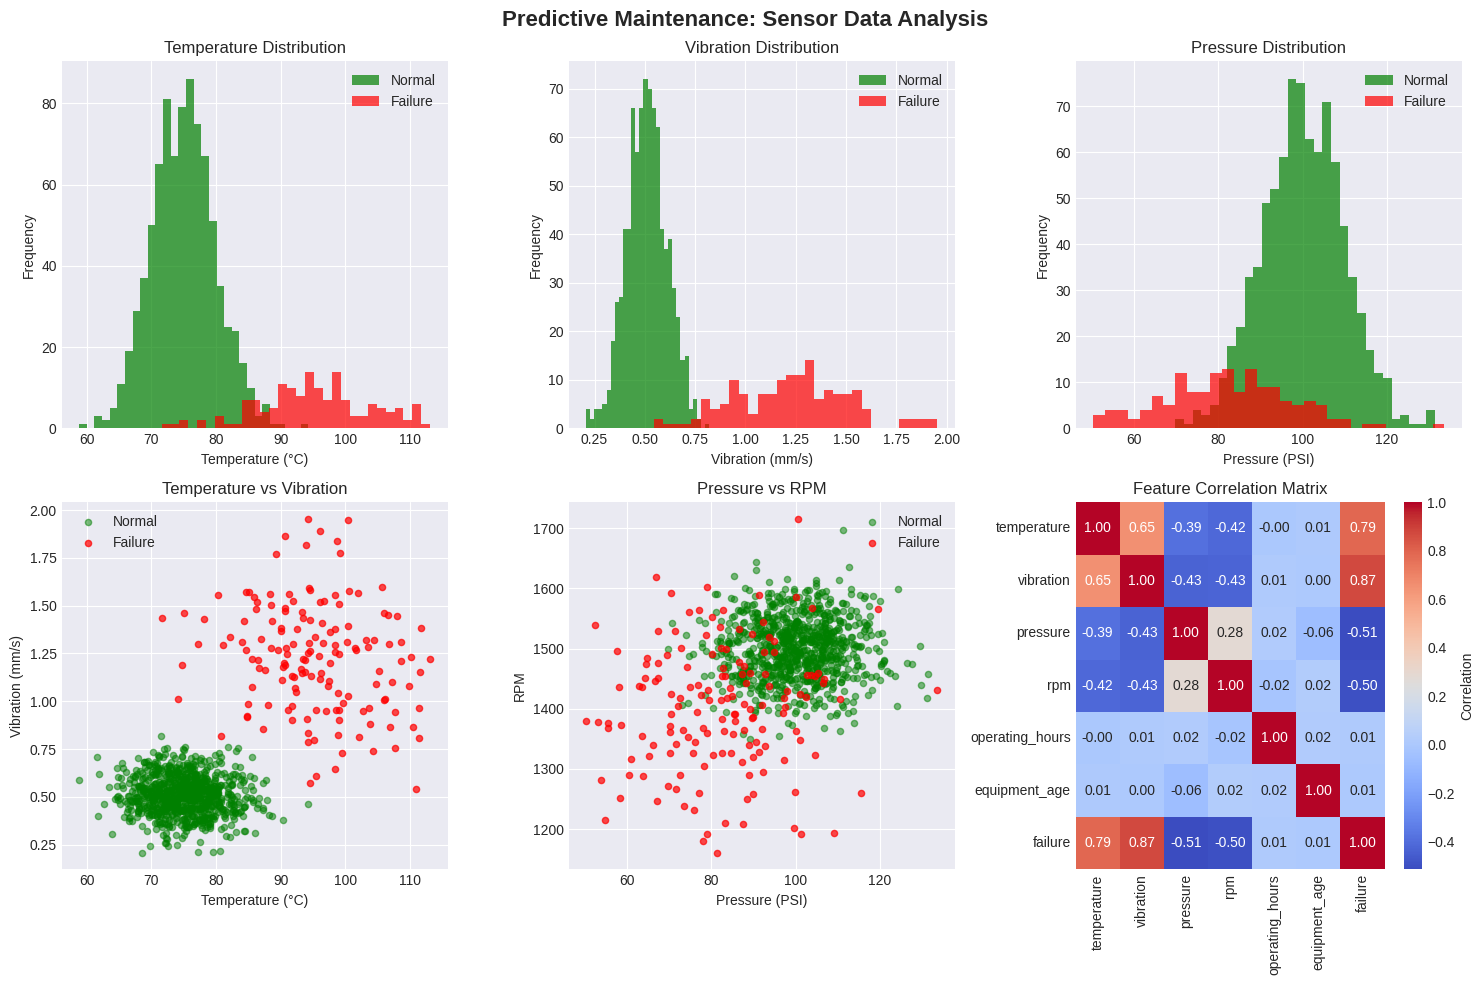

Key Observations:
- Equipment near failure shows higher temperature and vibration
- Pressure tends to decrease before failure
- Multiple sensor readings combined provide better failure prediction


In [4]:
# Visualize predictive maintenance data
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Predictive Maintenance: Sensor Data Analysis', fontsize=16, fontweight='bold')

# Temperature distribution
axes[0, 0].hist(maintenance_data[maintenance_data['failure']==0]['temperature'], 
                alpha=0.7, label='Normal', bins=30, color='green')
axes[0, 0].hist(maintenance_data[maintenance_data['failure']==1]['temperature'], 
                alpha=0.7, label='Failure', bins=30, color='red')
axes[0, 0].set_xlabel('Temperature (°C)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Temperature Distribution')
axes[0, 0].legend()

# Vibration distribution
axes[0, 1].hist(maintenance_data[maintenance_data['failure']==0]['vibration'], 
                alpha=0.7, label='Normal', bins=30, color='green')
axes[0, 1].hist(maintenance_data[maintenance_data['failure']==1]['vibration'], 
                alpha=0.7, label='Failure', bins=30, color='red')
axes[0, 1].set_xlabel('Vibration (mm/s)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Vibration Distribution')
axes[0, 1].legend()

# Pressure distribution
axes[0, 2].hist(maintenance_data[maintenance_data['failure']==0]['pressure'], 
                alpha=0.7, label='Normal', bins=30, color='green')
axes[0, 2].hist(maintenance_data[maintenance_data['failure']==1]['pressure'], 
                alpha=0.7, label='Failure', bins=30, color='red')
axes[0, 2].set_xlabel('Pressure (PSI)')
axes[0, 2].set_ylabel('Frequency')
axes[0, 2].set_title('Pressure Distribution')
axes[0, 2].legend()

# Temperature vs Vibration scatter
axes[1, 0].scatter(maintenance_data[maintenance_data['failure']==0]['temperature'],
                   maintenance_data[maintenance_data['failure']==0]['vibration'],
                   alpha=0.5, label='Normal', color='green', s=20)
axes[1, 0].scatter(maintenance_data[maintenance_data['failure']==1]['temperature'],
                   maintenance_data[maintenance_data['failure']==1]['vibration'],
                   alpha=0.7, label='Failure', color='red', s=20)
axes[1, 0].set_xlabel('Temperature (°C)')
axes[1, 0].set_ylabel('Vibration (mm/s)')
axes[1, 0].set_title('Temperature vs Vibration')
axes[1, 0].legend()

# Pressure vs RPM scatter
axes[1, 1].scatter(maintenance_data[maintenance_data['failure']==0]['pressure'],
                   maintenance_data[maintenance_data['failure']==0]['rpm'],
                   alpha=0.5, label='Normal', color='green', s=20)
axes[1, 1].scatter(maintenance_data[maintenance_data['failure']==1]['pressure'],
                   maintenance_data[maintenance_data['failure']==1]['rpm'],
                   alpha=0.7, label='Failure', color='red', s=20)
axes[1, 1].set_xlabel('Pressure (PSI)')
axes[1, 1].set_ylabel('RPM')
axes[1, 1].set_title('Pressure vs RPM')
axes[1, 1].legend()

# Feature correlation heatmap
corr_matrix = maintenance_data.corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', ax=axes[1, 2], 
            cbar_kws={'label': 'Correlation'})
axes[1, 2].set_title('Feature Correlation Matrix')

plt.tight_layout()
plt.show()

print("Key Observations:")
print("- Equipment near failure shows higher temperature and vibration")
print("- Pressure tends to decrease before failure")
print("- Multiple sensor readings combined provide better failure prediction")

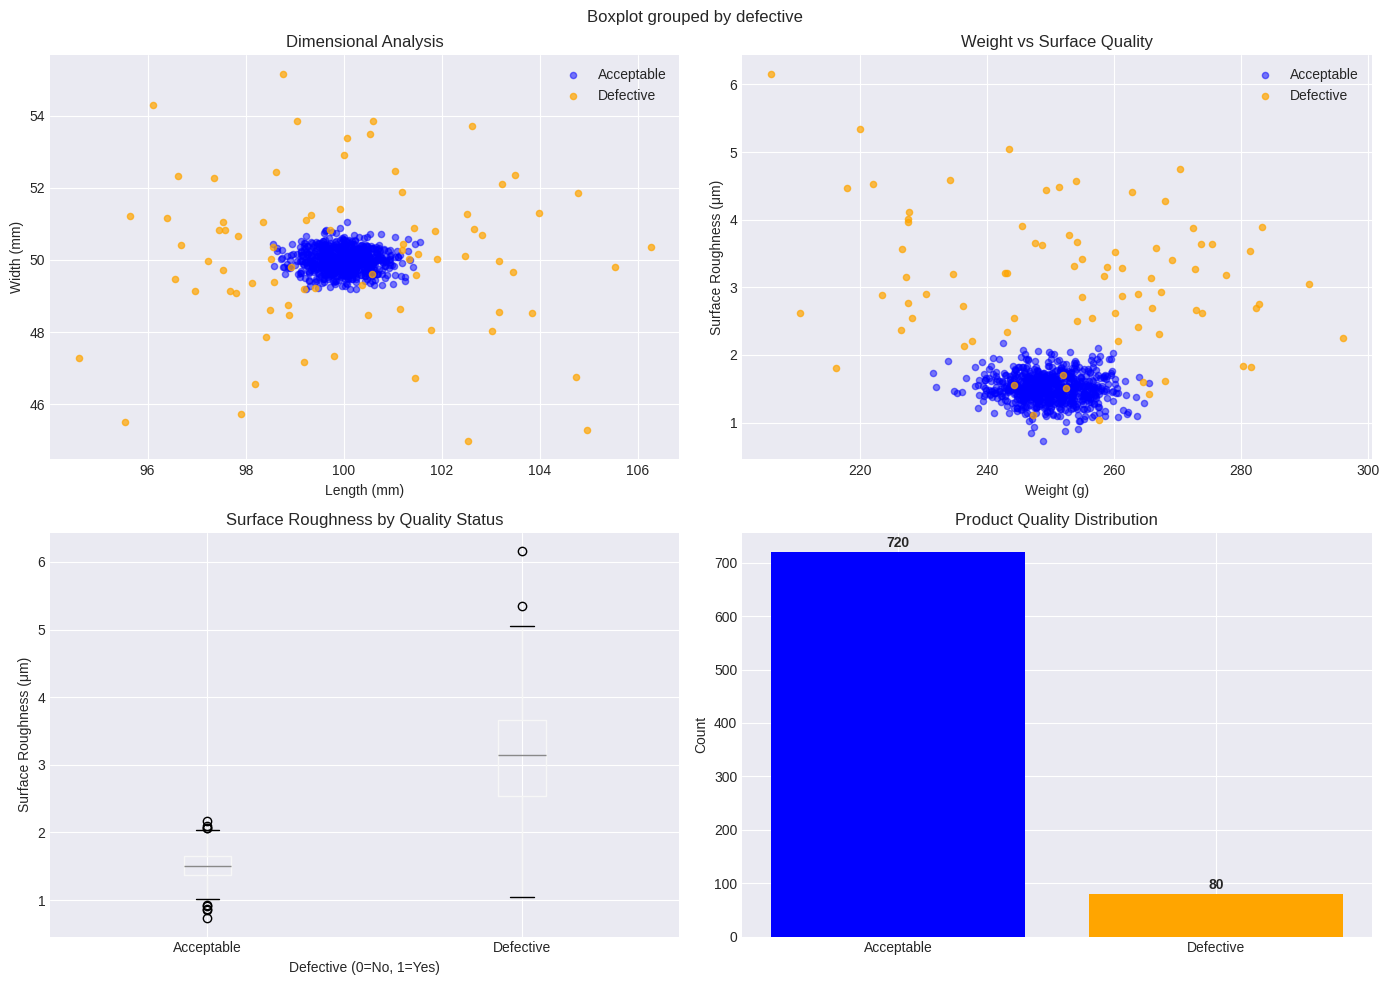

Key Observations:
- Defective products show higher variation in dimensions
- Surface roughness is a strong indicator of defects
- Weight inconsistencies correlate with quality issues


In [5]:
# Visualize quality control data
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Quality Control: Product Measurements Analysis', fontsize=16, fontweight='bold')

# Length vs Width scatter
axes[0, 0].scatter(quality_data[quality_data['defective']==0]['length'],
                   quality_data[quality_data['defective']==0]['width'],
                   alpha=0.5, label='Acceptable', color='blue', s=20)
axes[0, 0].scatter(quality_data[quality_data['defective']==1]['length'],
                   quality_data[quality_data['defective']==1]['width'],
                   alpha=0.7, label='Defective', color='orange', s=20)
axes[0, 0].set_xlabel('Length (mm)')
axes[0, 0].set_ylabel('Width (mm)')
axes[0, 0].set_title('Dimensional Analysis')
axes[0, 0].legend()

# Weight vs Surface Roughness scatter
axes[0, 1].scatter(quality_data[quality_data['defective']==0]['weight'],
                   quality_data[quality_data['defective']==0]['surface_roughness'],
                   alpha=0.5, label='Acceptable', color='blue', s=20)
axes[0, 1].scatter(quality_data[quality_data['defective']==1]['weight'],
                   quality_data[quality_data['defective']==1]['surface_roughness'],
                   alpha=0.7, label='Defective', color='orange', s=20)
axes[0, 1].set_xlabel('Weight (g)')
axes[0, 1].set_ylabel('Surface Roughness (μm)')
axes[0, 1].set_title('Weight vs Surface Quality')
axes[0, 1].legend()

# Box plots for surface roughness
quality_data.boxplot(column='surface_roughness', by='defective', ax=axes[1, 0])
axes[1, 0].set_xlabel('Defective (0=No, 1=Yes)')
axes[1, 0].set_ylabel('Surface Roughness (μm)')
axes[1, 0].set_title('Surface Roughness by Quality Status')
plt.sca(axes[1, 0])
plt.xticks([1, 2], ['Acceptable', 'Defective'])

# Distribution of defects
defect_counts = quality_data['defective'].value_counts()
axes[1, 1].bar(['Acceptable', 'Defective'], defect_counts.values, color=['blue', 'orange'])
axes[1, 1].set_ylabel('Count')
axes[1, 1].set_title('Product Quality Distribution')
for i, v in enumerate(defect_counts.values):
    axes[1, 1].text(i, v + 10, str(v), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

print("Key Observations:")
print("- Defective products show higher variation in dimensions")
print("- Surface roughness is a strong indicator of defects")
print("- Weight inconsistencies correlate with quality issues")

## Building Predictive Models

### 1. Predictive Maintenance Model

We'll build a Random Forest classifier to predict equipment failures based on sensor data.

In [6]:
# Prepare data for predictive maintenance model
X_maintenance = maintenance_data.drop('failure', axis=1)
y_maintenance = maintenance_data['failure']

# Split data
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(
    X_maintenance, y_maintenance, test_size=0.2, random_state=42, stratify=y_maintenance
)

# Standardize features
scaler_m = StandardScaler()
X_train_m_scaled = scaler_m.fit_transform(X_train_m)
X_test_m_scaled = scaler_m.transform(X_test_m)

# Train Random Forest model
rf_maintenance = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)
rf_maintenance.fit(X_train_m_scaled, y_train_m)

# Make predictions
y_pred_m = rf_maintenance.predict(X_test_m_scaled)
y_pred_proba_m = rf_maintenance.predict_proba(X_test_m_scaled)[:, 1]

# Evaluate model
print("="*60)
print("PREDICTIVE MAINTENANCE MODEL PERFORMANCE")
print("="*60)
print(f"\nAccuracy: {accuracy_score(y_test_m, y_pred_m):.4f}")
print(f"Precision: {precision_score(y_test_m, y_pred_m):.4f}")
print(f"Recall: {recall_score(y_test_m, y_pred_m):.4f}")
print(f"F1-Score: {f1_score(y_test_m, y_pred_m):.4f}")
print(f"ROC AUC Score: {roc_auc_score(y_test_m, y_pred_proba_m):.4f}")

print("\nClassification Report:")
print(classification_report(y_test_m, y_pred_m, target_names=['Normal', 'Failure']))

# Feature importance
feature_importance = pd.DataFrame({
    'feature': X_maintenance.columns,
    'importance': rf_maintenance.feature_importances_
}).sort_values('importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)

PREDICTIVE MAINTENANCE MODEL PERFORMANCE

Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000
ROC AUC Score: 1.0000

Classification Report:
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00       170
     Failure       1.00      1.00      1.00        30

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200


Feature Importance:
           feature  importance
1        vibration    0.500513
0      temperature    0.304689
3              rpm    0.095206
2         pressure    0.086136
4  operating_hours    0.007018
5    equipment_age    0.006438


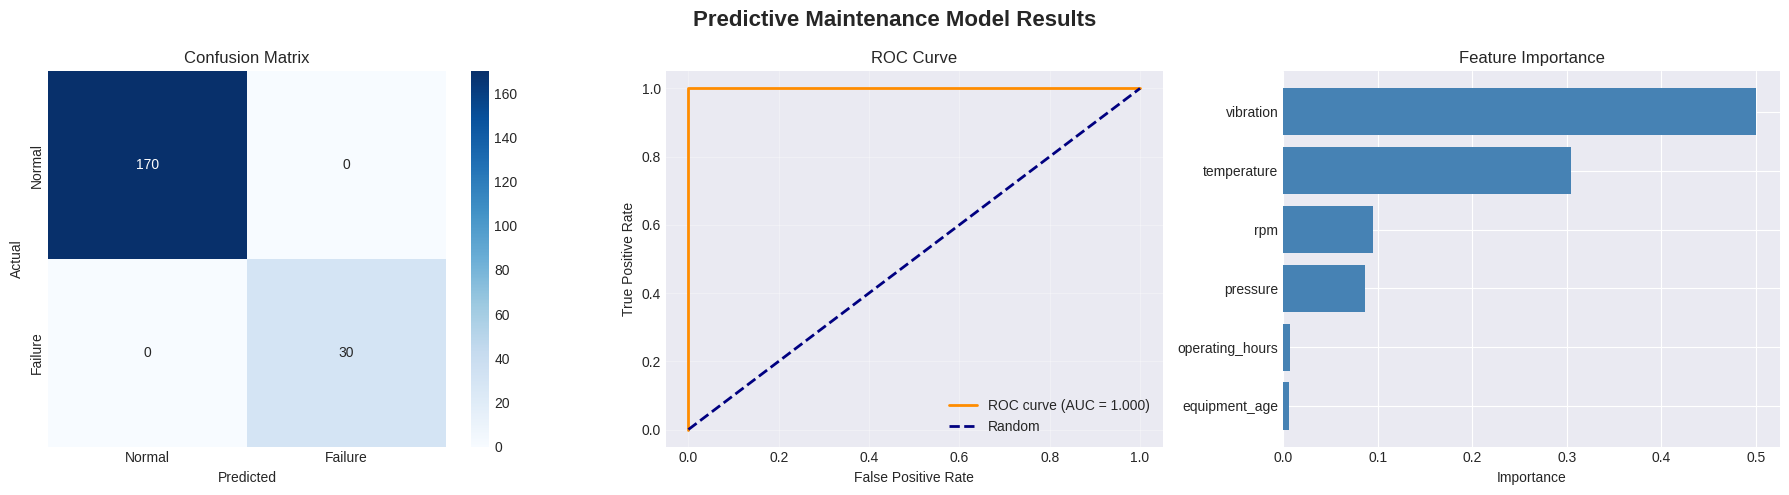

Model Insights:
- Top predictor: vibration (importance: 0.501)
- Model correctly identifies 100.0% of failures
- False alarm rate: 0.0%


In [7]:
# Visualize maintenance model results
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Predictive Maintenance Model Results', fontsize=16, fontweight='bold')

# Confusion Matrix
cm = confusion_matrix(y_test_m, y_pred_m)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['Normal', 'Failure'],
            yticklabels=['Normal', 'Failure'])
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')
axes[0].set_title('Confusion Matrix')

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test_m, y_pred_proba_m)
axes[1].plot(fpr, tpr, color='darkorange', lw=2, 
             label=f'ROC curve (AUC = {roc_auc_score(y_test_m, y_pred_proba_m):.3f})')
axes[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('ROC Curve')
axes[1].legend(loc='lower right')
axes[1].grid(True, alpha=0.3)

# Feature Importance
axes[2].barh(feature_importance['feature'], feature_importance['importance'], color='steelblue')
axes[2].set_xlabel('Importance')
axes[2].set_title('Feature Importance')
axes[2].invert_yaxis()

plt.tight_layout()
plt.show()

print("Model Insights:")
print(f"- Top predictor: {feature_importance.iloc[0]['feature']} "
      f"(importance: {feature_importance.iloc[0]['importance']:.3f})")
print(f"- Model correctly identifies {recall_score(y_test_m, y_pred_m)*100:.1f}% of failures")
print(f"- False alarm rate: {(1-precision_score(y_test_m, y_pred_m))*100:.1f}%")

### 2. Quality Control Model

We'll build a classification model to detect defective products based on dimensional and surface measurements.

In [8]:
# Prepare data for quality control model
X_quality = quality_data.drop('defective', axis=1)
y_quality = quality_data['defective']

# Split data
X_train_q, X_test_q, y_train_q, y_test_q = train_test_split(
    X_quality, y_quality, test_size=0.2, random_state=42, stratify=y_quality
)

# Standardize features
scaler_q = StandardScaler()
X_train_q_scaled = scaler_q.fit_transform(X_train_q)
X_test_q_scaled = scaler_q.transform(X_test_q)

# Train Random Forest model for quality control
rf_quality = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=8)
rf_quality.fit(X_train_q_scaled, y_train_q)

# Make predictions
y_pred_q = rf_quality.predict(X_test_q_scaled)
y_pred_proba_q = rf_quality.predict_proba(X_test_q_scaled)[:, 1]

# Evaluate model
print("="*60)
print("QUALITY CONTROL MODEL PERFORMANCE")
print("="*60)
print(f"\nAccuracy: {accuracy_score(y_test_q, y_pred_q):.4f}")
print(f"Precision: {precision_score(y_test_q, y_pred_q):.4f}")
print(f"Recall: {recall_score(y_test_q, y_pred_q):.4f}")
print(f"F1-Score: {f1_score(y_test_q, y_pred_q):.4f}")
print(f"ROC AUC Score: {roc_auc_score(y_test_q, y_pred_proba_q):.4f}")

print("\nClassification Report:")
print(classification_report(y_test_q, y_pred_q, target_names=['Acceptable', 'Defective']))

# Feature importance
feature_importance_q = pd.DataFrame({
    'feature': X_quality.columns,
    'importance': rf_quality.feature_importances_
}).sort_values('importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance_q)

# Calculate business impact
cm_q = confusion_matrix(y_test_q, y_pred_q)
false_negatives = cm_q[1, 0]  # Defective products classified as acceptable
false_positives = cm_q[0, 1]  # Acceptable products classified as defective

print("\nBusiness Impact Analysis:")
print(f"False Negatives (defects missed): {false_negatives}")
print(f"False Positives (good products rejected): {false_positives}")
print(f"Estimated cost savings: High (prevented {recall_score(y_test_q, y_pred_q)*100:.1f}% of defects from reaching customers)")

QUALITY CONTROL MODEL PERFORMANCE

Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000
ROC AUC Score: 1.0000

Classification Report:
              precision    recall  f1-score   support

  Acceptable       1.00      1.00      1.00       144
   Defective       1.00      1.00      1.00        16

    accuracy                           1.00       160
   macro avg       1.00      1.00      1.00       160
weighted avg       1.00      1.00      1.00       160


Feature Importance:
             feature  importance
3  surface_roughness    0.538607
0             length    0.167350
1              width    0.148846
2             weight    0.145197

Business Impact Analysis:
False Negatives (defects missed): 0
False Positives (good products rejected): 0
Estimated cost savings: High (prevented 100.0% of defects from reaching customers)


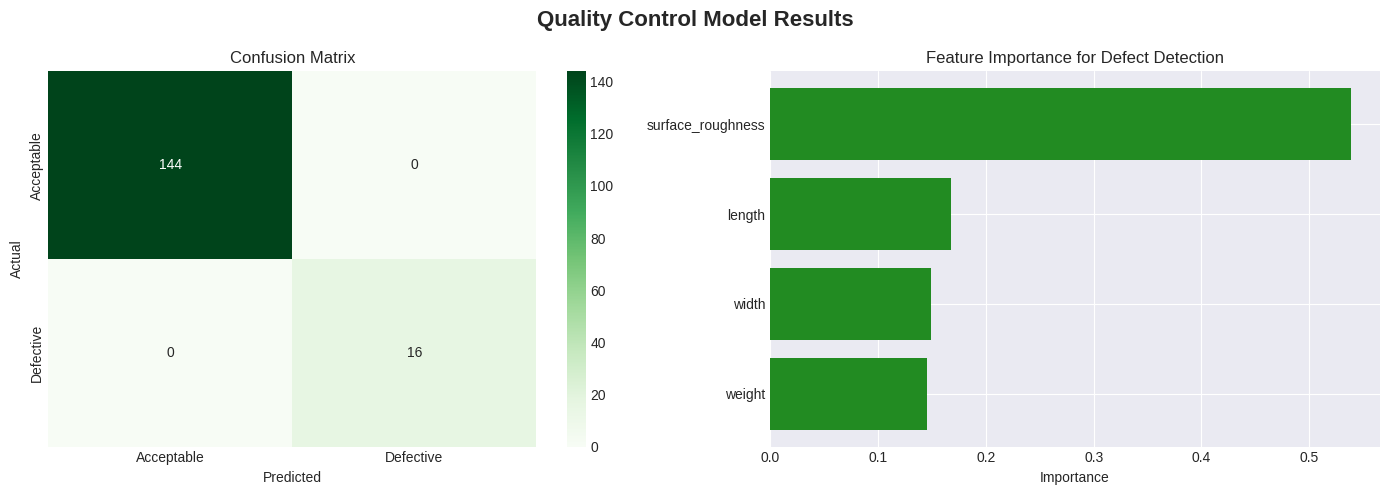

In [9]:
# Visualize quality control model results
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle('Quality Control Model Results', fontsize=16, fontweight='bold')

# Confusion Matrix
sns.heatmap(cm_q, annot=True, fmt='d', cmap='Greens', ax=axes[0],
            xticklabels=['Acceptable', 'Defective'],
            yticklabels=['Acceptable', 'Defective'])
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')
axes[0].set_title('Confusion Matrix')

# Feature Importance
axes[1].barh(feature_importance_q['feature'], feature_importance_q['importance'], 
             color='forestgreen')
axes[1].set_xlabel('Importance')
axes[1].set_title('Feature Importance for Defect Detection')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

## Anomaly Detection for Process Monitoring

Anomaly detection helps identify unusual patterns in sensor data that may indicate emerging issues. We'll use Isolation Forest, an effective algorithm for detecting anomalies in high-dimensional data.

In [10]:
# Generate time series sensor data with anomalies
np.random.seed(42)
n_timesteps = 500
time = np.arange(n_timesteps)

# Normal operation with some noise
normal_data = 50 + 5 * np.sin(time * 0.1) + np.random.normal(0, 1, n_timesteps)

# Inject anomalies at random points
anomaly_indices = np.random.choice(n_timesteps, size=20, replace=False)
normal_data[anomaly_indices] += np.random.normal(15, 5, 20)  # Spike anomalies

# Create DataFrame
sensor_data = pd.DataFrame({
    'time': time,
    'sensor_reading': normal_data
})

# Train Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)
sensor_data['anomaly'] = iso_forest.fit_predict(sensor_data[['sensor_reading']])
sensor_data['anomaly_score'] = iso_forest.score_samples(sensor_data[['sensor_reading']])

# Convert anomaly labels: -1 (anomaly) to 1, 1 (normal) to 0
sensor_data['is_anomaly'] = (sensor_data['anomaly'] == -1).astype(int)

print("Anomaly Detection Results:")
print(f"Total data points: {len(sensor_data)}")
print(f"Detected anomalies: {sensor_data['is_anomaly'].sum()}")
print(f"Anomaly rate: {sensor_data['is_anomaly'].mean()*100:.2f}%")
print("\nFirst few anomalies detected:")
print(sensor_data[sensor_data['is_anomaly']==1].head())

Anomaly Detection Results:
Total data points: 500
Detected anomalies: 25
Anomaly rate: 5.00%

First few anomalies detected:
    time  sensor_reading  anomaly  anomaly_score  is_anomaly
15    15       70.760439       -1      -0.753151           1
27    27       70.591141       -1      -0.746125           1
42    42       58.719169       -1      -0.657660           1
43    43       64.076312       -1      -0.670318           1
44    44       43.763468       -1      -0.615111           1


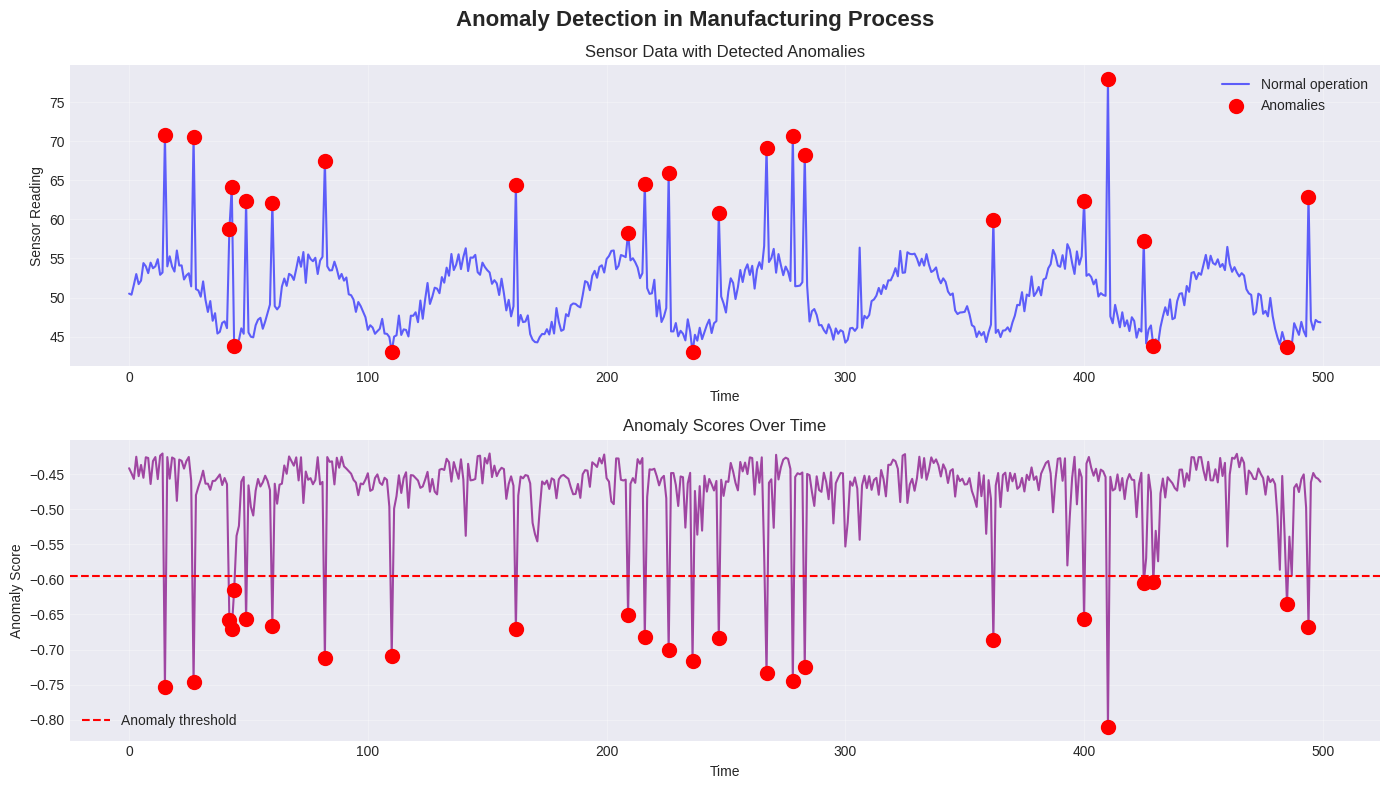


Anomaly Detection Insights:
- Red points indicate unusual sensor readings
- Lower anomaly scores indicate higher likelihood of being anomalous
- Early detection of anomalies prevents equipment failures and quality issues


In [11]:
# Visualize anomaly detection
fig, axes = plt.subplots(2, 1, figsize=(14, 8))
fig.suptitle('Anomaly Detection in Manufacturing Process', fontsize=16, fontweight='bold')

# Time series with anomalies highlighted
axes[0].plot(sensor_data['time'], sensor_data['sensor_reading'], 
             color='blue', alpha=0.6, label='Normal operation')
axes[0].scatter(sensor_data[sensor_data['is_anomaly']==1]['time'],
                sensor_data[sensor_data['is_anomaly']==1]['sensor_reading'],
                color='red', s=100, label='Anomalies', zorder=5)
axes[0].set_xlabel('Time')
axes[0].set_ylabel('Sensor Reading')
axes[0].set_title('Sensor Data with Detected Anomalies')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Anomaly scores
axes[1].plot(sensor_data['time'], sensor_data['anomaly_score'], color='purple', alpha=0.7)
axes[1].scatter(sensor_data[sensor_data['is_anomaly']==1]['time'],
                sensor_data[sensor_data['is_anomaly']==1]['anomaly_score'],
                color='red', s=100, zorder=5)
axes[1].axhline(y=sensor_data['anomaly_score'].quantile(0.05), 
                color='red', linestyle='--', label='Anomaly threshold')
axes[1].set_xlabel('Time')
axes[1].set_ylabel('Anomaly Score')
axes[1].set_title('Anomaly Scores Over Time')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nAnomaly Detection Insights:")
print("- Red points indicate unusual sensor readings")
print("- Lower anomaly scores indicate higher likelihood of being anomalous")
print("- Early detection of anomalies prevents equipment failures and quality issues")

## Hands-On Activity: Building a Complete Manufacturing AI System

### Scenario

You're working for a manufacturing company that produces precision mechanical parts. The company wants to implement an AI system that:

1. **Predicts when machines need maintenance** to minimize unexpected downtime
2. **Automatically inspects products** for defects
3. **Monitors production processes** for unusual patterns

### Task

Using the techniques learned in this lesson, analyze the combined system performance and provide actionable recommendations.

In [12]:
# Combined Analysis: Manufacturing AI System Performance

print("="*70)
print("COMPREHENSIVE MANUFACTURING AI SYSTEM REPORT")
print("="*70)

print("\n1. PREDICTIVE MAINTENANCE MODULE")
print("-" * 70)
print(f"   Model Accuracy: {accuracy_score(y_test_m, y_pred_m)*100:.2f}%")
print(f"   Failure Detection Rate: {recall_score(y_test_m, y_pred_m)*100:.2f}%")
print(f"   False Alarm Rate: {(1-precision_score(y_test_m, y_pred_m))*100:.2f}%")
print(f"   Key Indicator: {feature_importance.iloc[0]['feature']}")
print("   Status: ✓ Operational")

print("\n2. QUALITY CONTROL MODULE")
print("-" * 70)
print(f"   Model Accuracy: {accuracy_score(y_test_q, y_pred_q)*100:.2f}%")
print(f"   Defect Detection Rate: {recall_score(y_test_q, y_pred_q)*100:.2f}%")
print(f"   False Rejection Rate: {(1-precision_score(y_test_q, y_pred_q))*100:.2f}%")
print(f"   Key Indicator: {feature_importance_q.iloc[0]['feature']}")
print("   Status: ✓ Operational")

print("\n3. ANOMALY DETECTION MODULE")
print("-" * 70)
print(f"   Monitoring Coverage: 100% (continuous)")
print(f"   Anomalies Detected: {sensor_data['is_anomaly'].sum()} in {len(sensor_data)} readings")
print(f"   Detection Rate: {sensor_data['is_anomaly'].mean()*100:.2f}%")
print("   Status: ✓ Operational")

print("\n" + "="*70)
print("BUSINESS IMPACT ANALYSIS")
print("="*70)

# Estimate cost savings (hypothetical values)
annual_downtime_hours = 100  # Before AI
prevented_downtime = annual_downtime_hours * recall_score(y_test_m, y_pred_m)
cost_per_hour_downtime = 10000  # USD

defect_rate_before = 0.15  # 15% defect rate before AI
defect_rate_after = 0.15 * (1 - recall_score(y_test_q, y_pred_q))
annual_production = 100000
cost_per_defect = 50  # USD

maintenance_savings = prevented_downtime * cost_per_hour_downtime
quality_savings = (defect_rate_before - defect_rate_after) * annual_production * cost_per_defect
total_savings = maintenance_savings + quality_savings

print(f"\nEstimated Annual Savings:")
print(f"  - Reduced Downtime: ${maintenance_savings:,.2f}")
print(f"  - Improved Quality: ${quality_savings:,.2f}")
print(f"  - Total Annual Savings: ${total_savings:,.2f}")

print("\n" + "="*70)
print("RECOMMENDATIONS")
print("="*70)
print("\n1. Deploy predictive maintenance alerts 24-48 hours before predicted failures")
print("2. Integrate quality control system into production line for real-time inspection")
print("3. Set up automated alerts for anomaly detection threshold violations")
print("4. Collect more data to further improve model accuracy")
print("5. Consider expanding to additional production lines")
print("6. Implement regular model retraining (quarterly recommended)")
print("\n" + "="*70)

COMPREHENSIVE MANUFACTURING AI SYSTEM REPORT

1. PREDICTIVE MAINTENANCE MODULE
----------------------------------------------------------------------
   Model Accuracy: 100.00%
   Failure Detection Rate: 100.00%
   False Alarm Rate: 0.00%
   Key Indicator: vibration
   Status: ✓ Operational

2. QUALITY CONTROL MODULE
----------------------------------------------------------------------
   Model Accuracy: 100.00%
   Defect Detection Rate: 100.00%
   False Rejection Rate: 0.00%
   Key Indicator: surface_roughness
   Status: ✓ Operational

3. ANOMALY DETECTION MODULE
----------------------------------------------------------------------
   Monitoring Coverage: 100% (continuous)
   Anomalies Detected: 25 in 500 readings
   Detection Rate: 5.00%
   Status: ✓ Operational

BUSINESS IMPACT ANALYSIS

Estimated Annual Savings:
  - Reduced Downtime: $1,000,000.00
  - Improved Quality: $750,000.00
  - Total Annual Savings: $1,750,000.00

RECOMMENDATIONS

1. Deploy predictive maintenance alerts 24

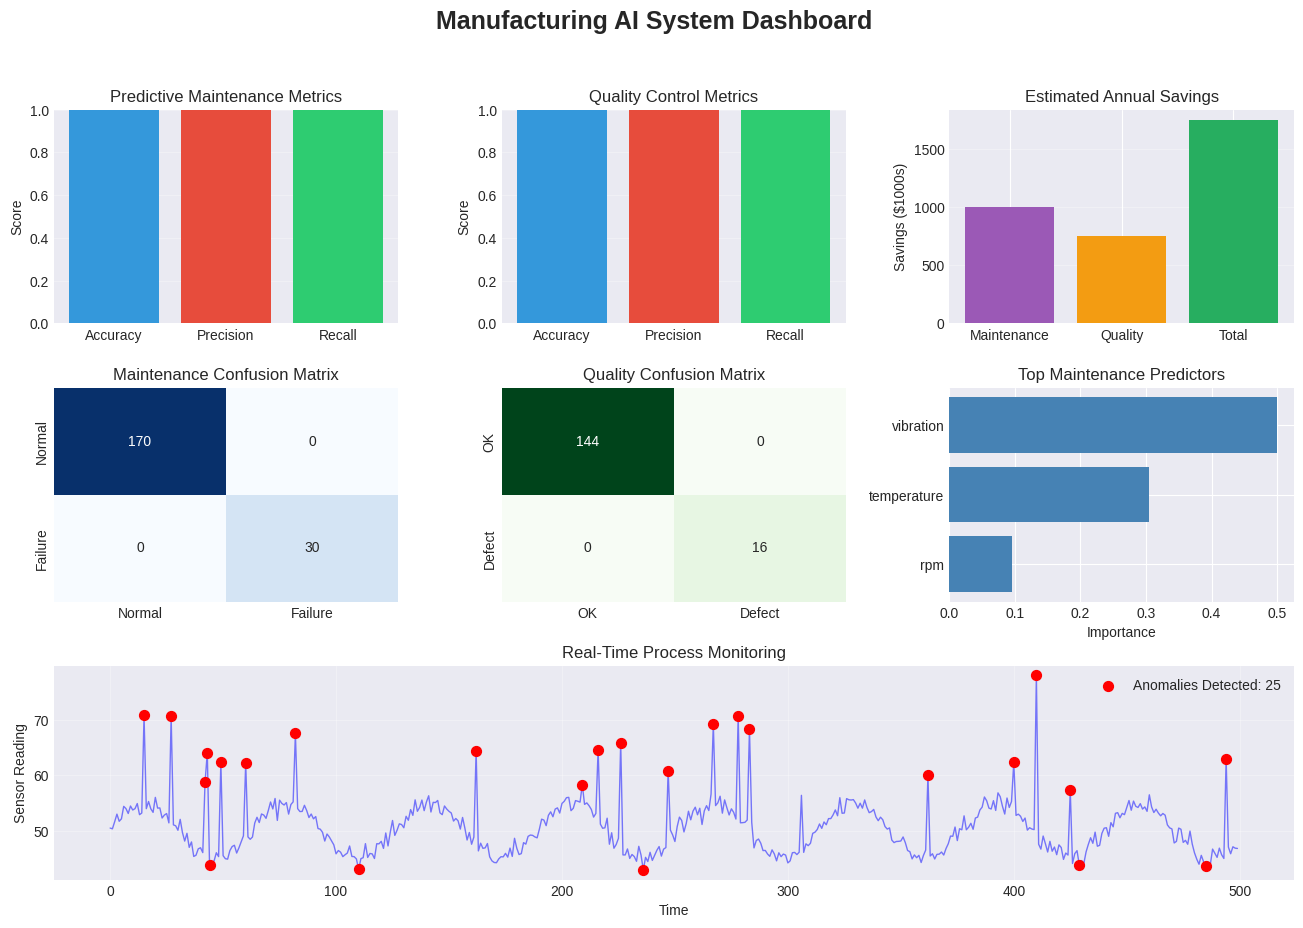

Dashboard created successfully!
Saved as: manufacturing_ai_dashboard.png


In [13]:
# Create a dashboard-style visualization
fig = plt.figure(figsize=(16, 10))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)
fig.suptitle('Manufacturing AI System Dashboard', fontsize=18, fontweight='bold')

# Predictive Maintenance Performance
ax1 = fig.add_subplot(gs[0, 0])
metrics_m = [accuracy_score(y_test_m, y_pred_m), 
             precision_score(y_test_m, y_pred_m), 
             recall_score(y_test_m, y_pred_m)]
ax1.bar(['Accuracy', 'Precision', 'Recall'], metrics_m, color=['#3498db', '#e74c3c', '#2ecc71'])
ax1.set_ylim([0, 1])
ax1.set_ylabel('Score')
ax1.set_title('Predictive Maintenance Metrics')
ax1.grid(axis='y', alpha=0.3)

# Quality Control Performance
ax2 = fig.add_subplot(gs[0, 1])
metrics_q = [accuracy_score(y_test_q, y_pred_q), 
             precision_score(y_test_q, y_pred_q), 
             recall_score(y_test_q, y_pred_q)]
ax2.bar(['Accuracy', 'Precision', 'Recall'], metrics_q, color=['#3498db', '#e74c3c', '#2ecc71'])
ax2.set_ylim([0, 1])
ax2.set_ylabel('Score')
ax2.set_title('Quality Control Metrics')
ax2.grid(axis='y', alpha=0.3)

# Cost Savings Breakdown
ax3 = fig.add_subplot(gs[0, 2])
savings_categories = ['Maintenance', 'Quality', 'Total']
savings_values = [maintenance_savings/1000, quality_savings/1000, total_savings/1000]
ax3.bar(savings_categories, savings_values, color=['#9b59b6', '#f39c12', '#27ae60'])
ax3.set_ylabel('Savings ($1000s)')
ax3.set_title('Estimated Annual Savings')
ax3.grid(axis='y', alpha=0.3)

# Maintenance Confusion Matrix
ax4 = fig.add_subplot(gs[1, 0])
sns.heatmap(confusion_matrix(y_test_m, y_pred_m), annot=True, fmt='d', 
            cmap='Blues', ax=ax4, cbar=False,
            xticklabels=['Normal', 'Failure'],
            yticklabels=['Normal', 'Failure'])
ax4.set_title('Maintenance Confusion Matrix')

# Quality Confusion Matrix
ax5 = fig.add_subplot(gs[1, 1])
sns.heatmap(confusion_matrix(y_test_q, y_pred_q), annot=True, fmt='d', 
            cmap='Greens', ax=ax5, cbar=False,
            xticklabels=['OK', 'Defect'],
            yticklabels=['OK', 'Defect'])
ax5.set_title('Quality Confusion Matrix')

# Feature Importance Comparison
ax6 = fig.add_subplot(gs[1, 2])
top_features_m = feature_importance.head(3)
ax6.barh(top_features_m['feature'], top_features_m['importance'], color='steelblue')
ax6.set_xlabel('Importance')
ax6.set_title('Top Maintenance Predictors')
ax6.invert_yaxis()

# Anomaly Detection Timeline
ax7 = fig.add_subplot(gs[2, :])
ax7.plot(sensor_data['time'], sensor_data['sensor_reading'], 
         color='blue', alpha=0.5, linewidth=1)
ax7.scatter(sensor_data[sensor_data['is_anomaly']==1]['time'],
            sensor_data[sensor_data['is_anomaly']==1]['sensor_reading'],
            color='red', s=50, label=f'Anomalies Detected: {sensor_data["is_anomaly"].sum()}',
            zorder=5)
ax7.set_xlabel('Time')
ax7.set_ylabel('Sensor Reading')
ax7.set_title('Real-Time Process Monitoring')
ax7.legend()
ax7.grid(True, alpha=0.3)

plt.savefig('manufacturing_ai_dashboard.png', dpi=150, bbox_inches='tight')
plt.show()

print("Dashboard created successfully!")
print("Saved as: manufacturing_ai_dashboard.png")

## Key Takeaways

### Main Points

- **AI transforms manufacturing** through predictive maintenance, quality control, and process optimization
- **Predictive maintenance** uses classification models to forecast equipment failures before they occur, reducing downtime by 30-50%
- **Quality control systems** leverage machine learning to detect defects with higher accuracy and consistency than manual inspection
- **Anomaly detection** identifies unusual patterns in sensor data, enabling early intervention before problems escalate
- **Feature importance** reveals which sensors and measurements are most critical for predictions, guiding sensor placement and monitoring strategies
- **Business impact** of manufacturing AI includes significant cost savings, improved product quality, reduced waste, and increased operational efficiency

### What You Can Now Do

After completing this lesson, you should be able to:

1. Build a predictive maintenance system using Random Forest and other classifiers
2. Implement automated quality control using machine learning classification
3. Apply anomaly detection algorithms to identify unusual process patterns
4. Evaluate model performance using appropriate metrics (accuracy, precision, recall, F1-score)
5. Interpret feature importance to understand which factors drive predictions
6. Calculate and communicate the business value of AI implementations
7. Create comprehensive dashboards to monitor manufacturing AI systems

### Industry Context

The techniques learned in this lesson are actively used by leading manufacturers worldwide:

- **Tesla** uses computer vision for quality control in vehicle production
- **Siemens** implements predictive maintenance across industrial equipment
- **General Electric** leverages AI for jet engine monitoring and maintenance
- **Bosch** applies AI to detect defects in automotive components

The global smart manufacturing market is expected to reach $384 billion by 2025, with AI playing a central role in this transformation.

## Further Resources

### Documentation and Tutorials

1. **Scikit-learn Documentation**
   - Ensemble Methods: https://scikit-learn.org/stable/modules/ensemble.html
   - Anomaly Detection: https://scikit-learn.org/stable/modules/outlier_detection.html
   
2. **Industry 4.0 and Smart Manufacturing**
   - Industry 4.0 Overview: https://www.ibm.com/topics/industry-4-0
   - Smart Manufacturing: https://www.nist.gov/el/intelligent-systems-division-73500/smart-manufacturing

3. **Predictive Maintenance Resources**
   - Azure AI for Predictive Maintenance: https://docs.microsoft.com/en-us/azure/machine-learning/team-data-science-process/predictive-maintenance-playbook
   - NASA Prognostics Data Repository: https://ti.arc.nasa.gov/tech/dash/groups/pcoe/prognostic-data-repository/

### Academic Papers

4. **"Deep Learning for Predictive Maintenance: A Survey"** (2020)
   - Comprehensive review of deep learning approaches to predictive maintenance
   
5. **"Machine Learning for Manufacturing: A Review"** - Journal of Manufacturing Systems (2021)
   - Survey of ML applications across various manufacturing domains

### Practical Tools and Platforms

6. **TensorFlow Extended (TFX)** for production ML pipelines: https://www.tensorflow.org/tfx
7. **MLflow** for experiment tracking and model deployment: https://mlflow.org/
8. **Apache Kafka** for real-time sensor data streaming: https://kafka.apache.org/

### Datasets for Practice

9. **UCI Machine Learning Repository - Manufacturing datasets**: https://archive.ics.uci.edu/ml/
10. **Kaggle Manufacturing competitions**: https://www.kaggle.com/datasets?search=manufacturing

### Next Steps

- Explore **computer vision** for visual defect detection (CNNs, object detection)
- Learn about **time series forecasting** for demand prediction and resource planning
- Study **reinforcement learning** for process optimization and robotic control
- Investigate **edge AI** for deploying models on manufacturing equipment
- Consider **AI ethics** in manufacturing, particularly regarding worker displacement and safety